In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from backtester import BackTester

In [12]:
from GavinB import splitAndSavePrices

splitAndSavePrices("prices.txt", 150)

Split data: 600 days for training, 150 days for testing
Training data shape: (50, 600)
Testing data shape: (50, 150)
Saved data to prices_train.txt
Saved data to prices_test.txt


(array([[38.25, 38.11, 37.9 , ..., 35.36, 35.28, 35.31],
        [69.06, 69.98, 69.56, ..., 54.8 , 55.1 , 54.98],
        [62.08, 62.39, 62.82, ..., 42.45, 42.63, 42.39],
        ...,
        [24.02, 24.04, 23.76, ..., 17.49, 17.27, 17.25],
        [76.03, 76.05, 75.66, ..., 79.38, 80.4 , 80.45],
        [27.5 , 27.54, 27.55, ..., 32.6 , 32.38, 32.01]], shape=(50, 600)),
 array([[35.08, 35.05, 35.32, ..., 36.58, 36.43, 36.24],
        [55.15, 54.61, 54.72, ..., 50.8 , 51.19, 50.64],
        [42.11, 42.99, 42.4 , ..., 44.25, 44.02, 43.43],
        ...,
        [17.24, 17.15, 17.31, ..., 15.81, 15.75, 15.74],
        [80.57, 80.87, 81.25, ..., 80.93, 80.8 , 80.5 ],
        [32.14, 32.1 , 31.82, ..., 31.83, 31.78, 31.59]], shape=(50, 150)))

In [2]:
tester = BackTester(750, 50, "prices.txt")

In [3]:
df = pd.DataFrame(tester.data.T)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,35.478173,59.342560,52.644373,32.591653,54.423133,29.333133,26.156987,52.958573,37.595293,71.913733,...,75.858733,47.850107,36.596040,31.584747,77.502493,28.497893,73.616947,19.871107,78.901387,30.853213
std,1.394284,4.700291,8.438597,2.305054,7.302339,1.771937,5.889256,5.223972,2.470817,11.320823,...,2.911402,4.379999,4.826003,3.425063,3.842469,0.749559,5.375440,2.824000,2.036854,1.894714
min,32.690000,50.640000,37.730000,27.510000,38.930000,25.830000,16.240000,41.560000,32.990000,51.260000,...,68.880000,39.670000,30.040000,26.310000,69.360000,27.080000,64.830000,15.730000,72.820000,26.410000
25%,34.352500,55.722500,45.805000,31.130000,48.792500,28.260000,20.662500,48.285000,35.590000,61.732500,...,73.580000,44.080000,33.670000,28.300000,74.145000,27.970000,69.600000,17.440000,77.890000,29.762500
50%,35.380000,58.790000,54.085000,32.470000,56.015000,28.870000,27.370000,52.720000,37.370000,73.760000,...,76.130000,48.170000,35.195000,31.590000,78.125000,28.450000,72.175000,18.645000,79.115000,31.245000
75%,36.430000,61.390000,60.137500,33.967500,60.372500,30.615000,30.737500,57.055000,39.320000,81.892500,...,77.797500,51.407500,38.387500,33.600000,80.810000,28.937500,76.250000,23.067500,80.020000,32.185000
max,38.800000,70.770000,67.510000,37.880000,66.680000,33.900000,37.370000,65.140000,45.550000,92.500000,...,83.120000,57.270000,50.760000,40.290000,86.690000,30.940000,88.970000,24.960000,84.700000,34.190000


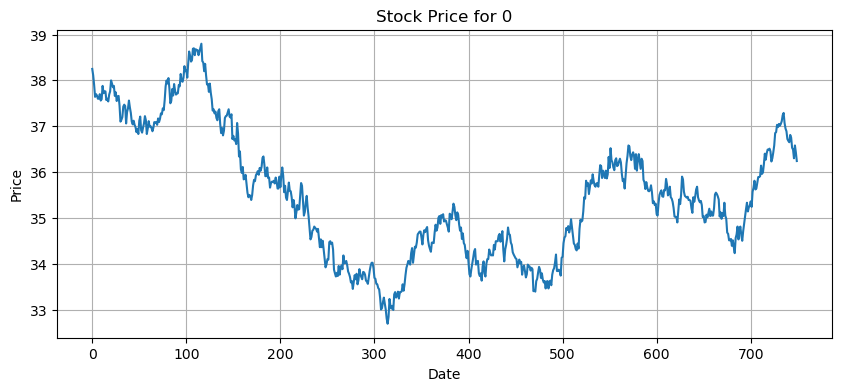

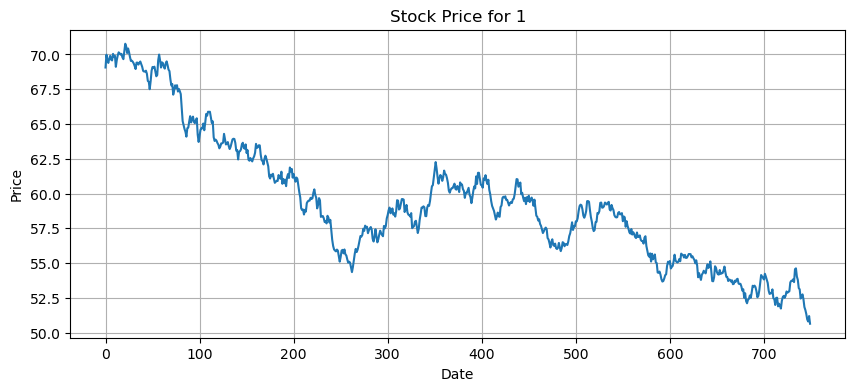

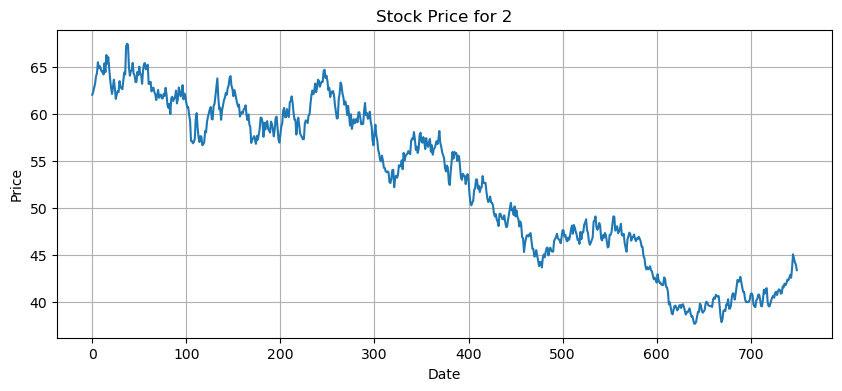

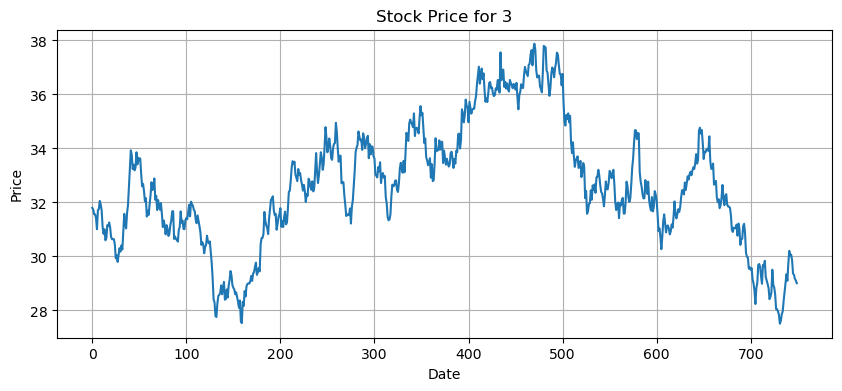

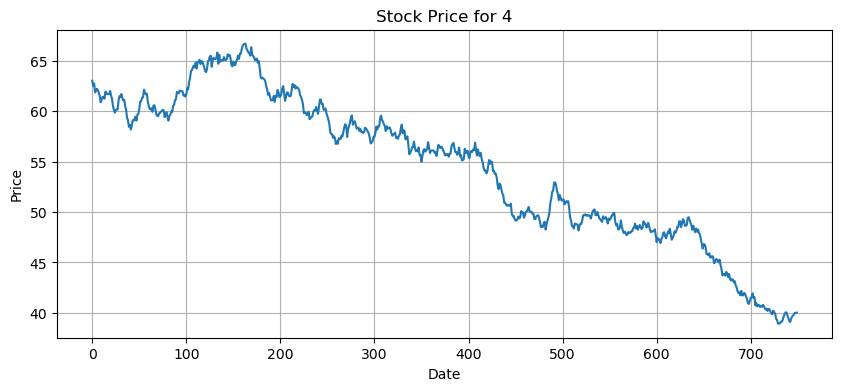

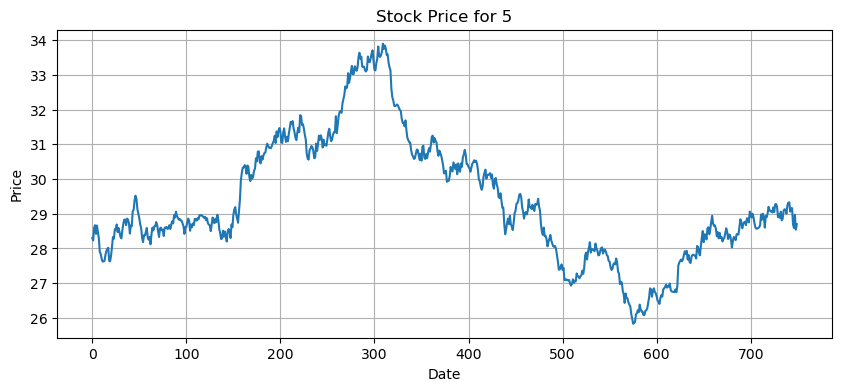

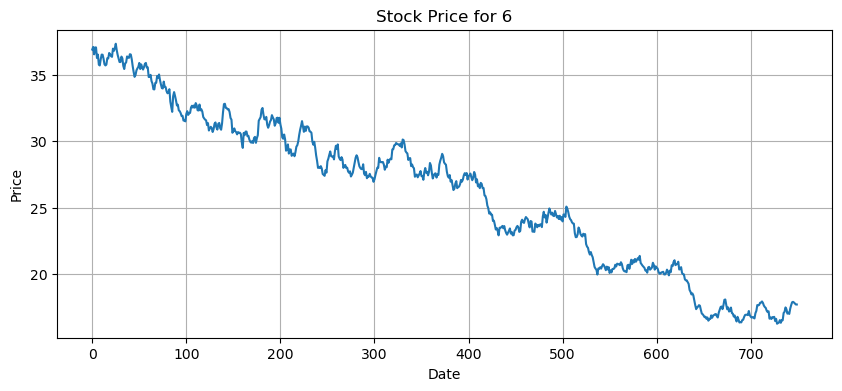

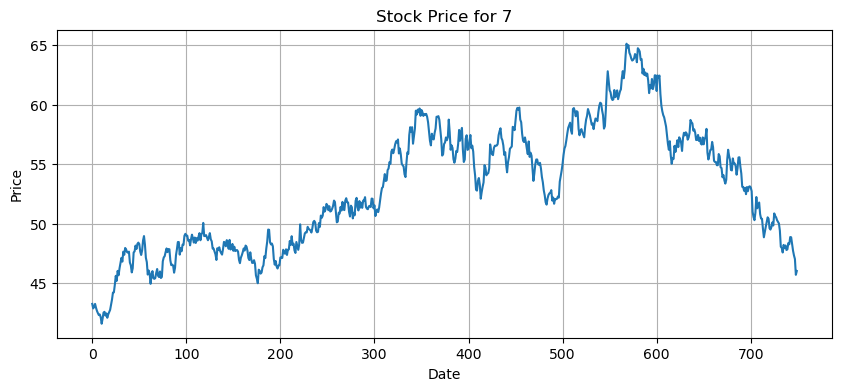

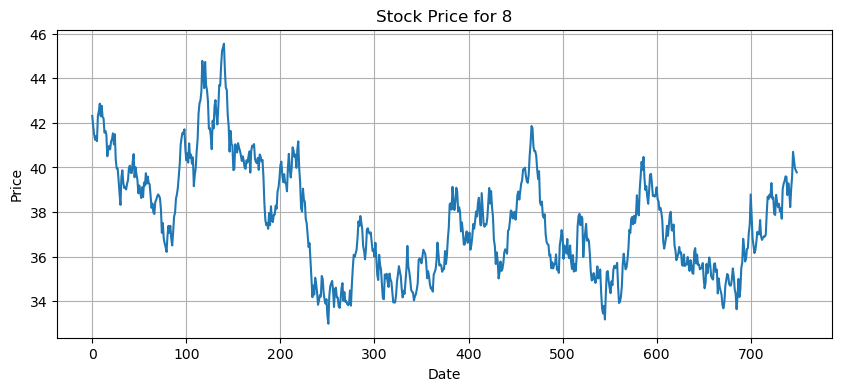

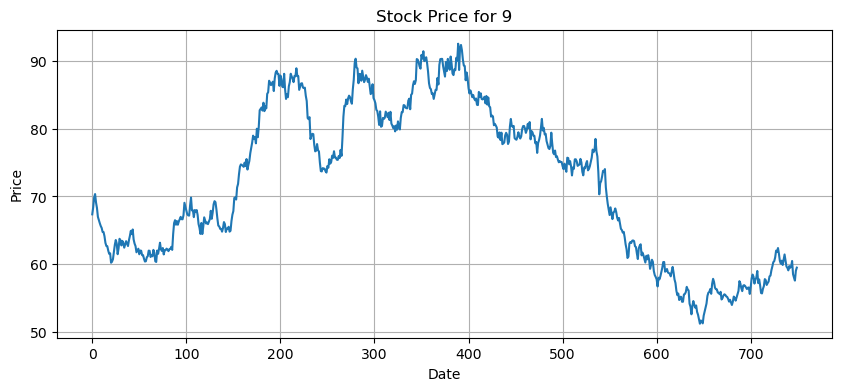

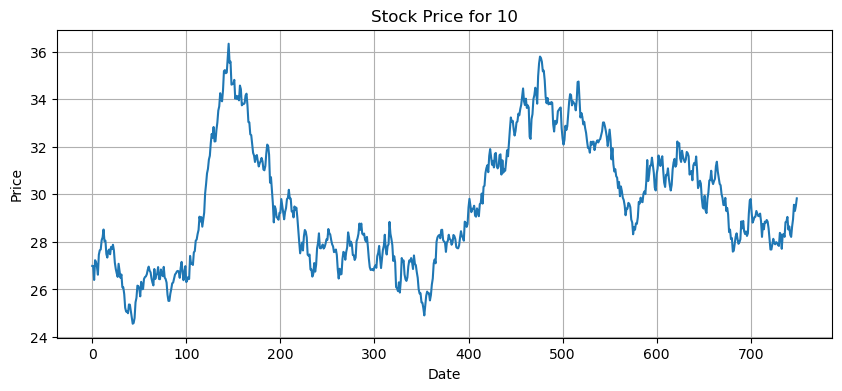

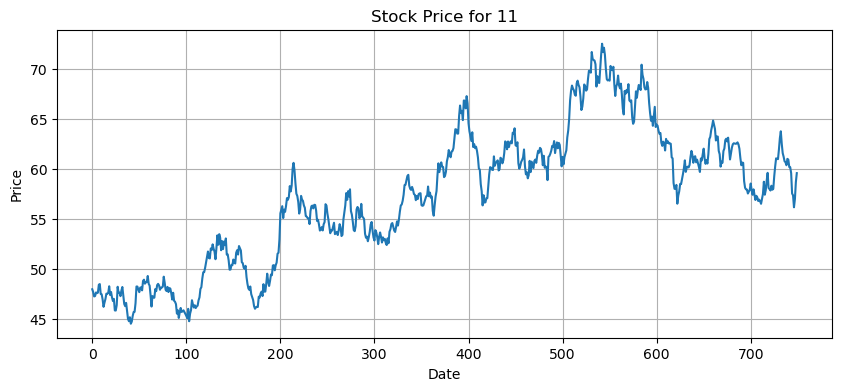

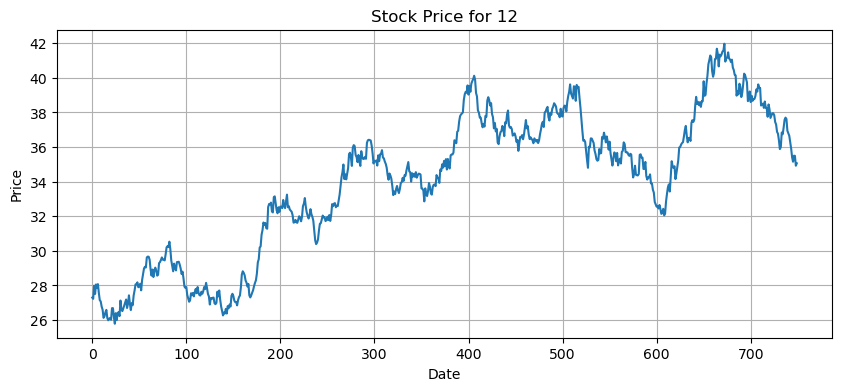

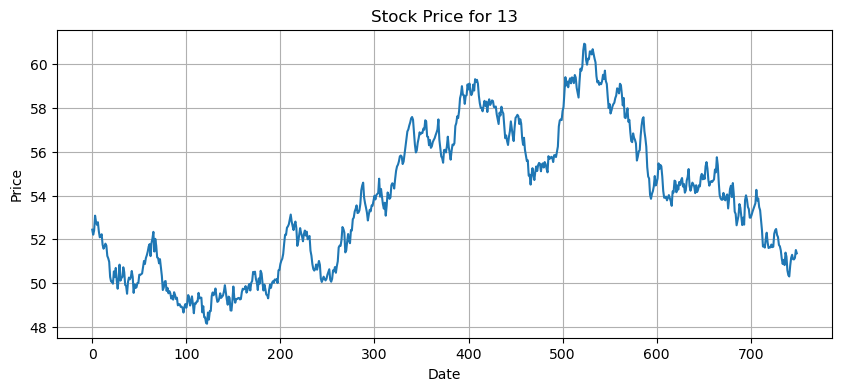

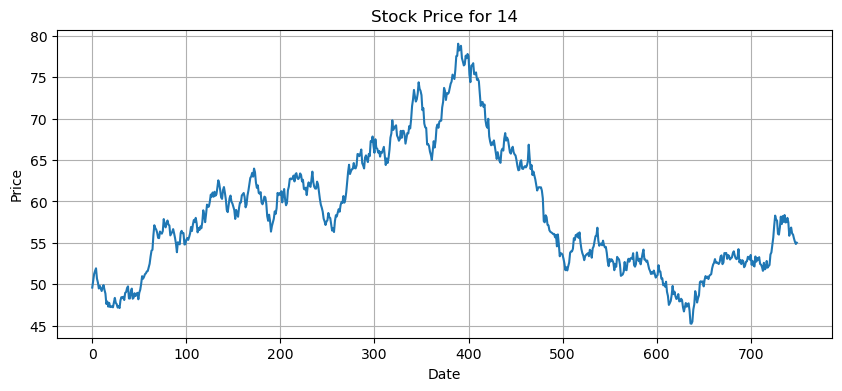

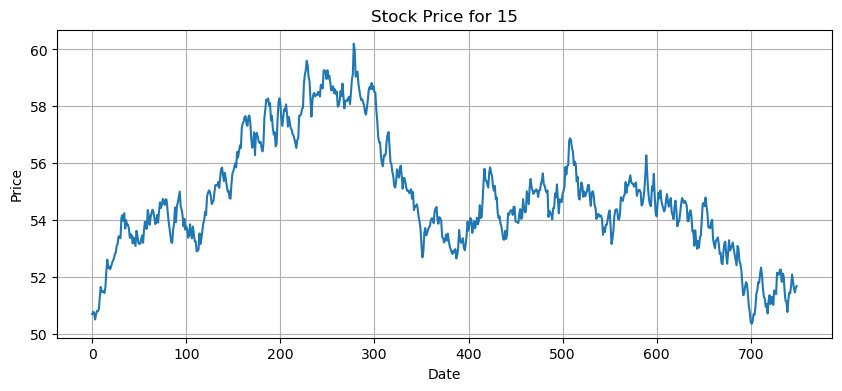

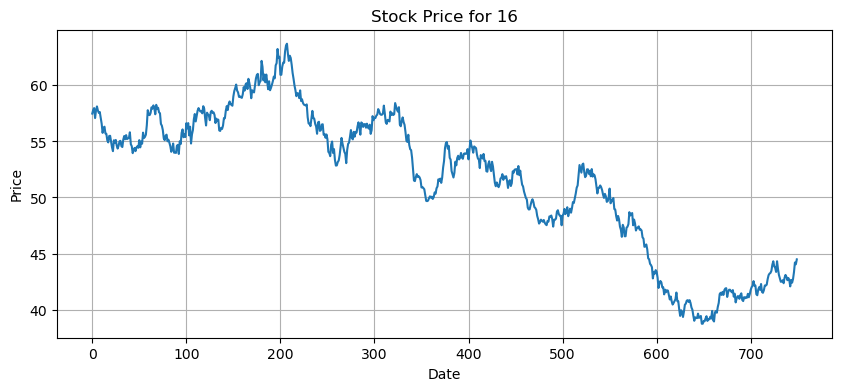

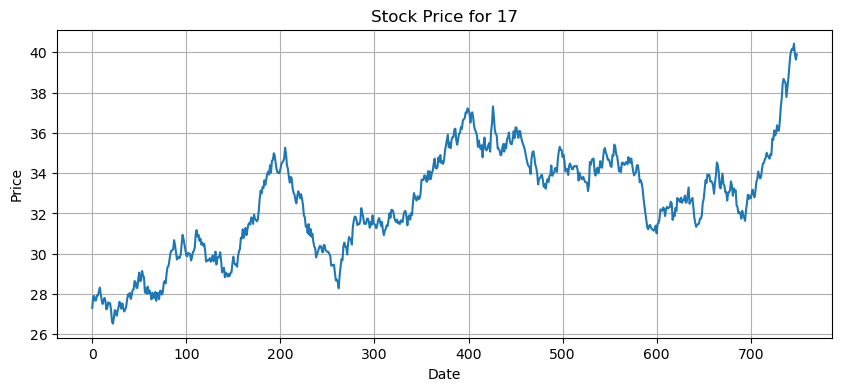

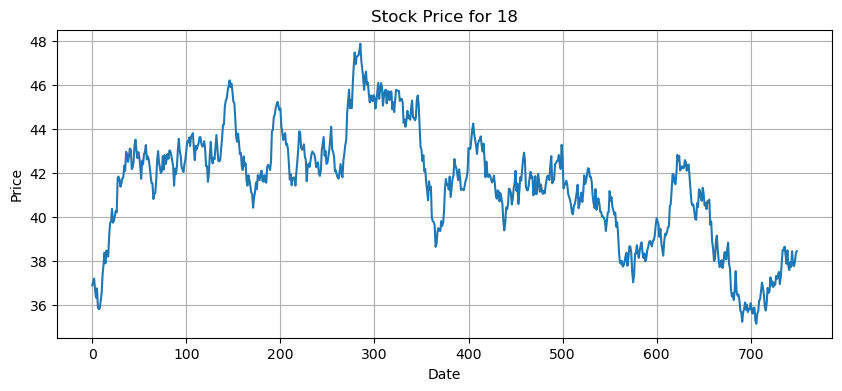

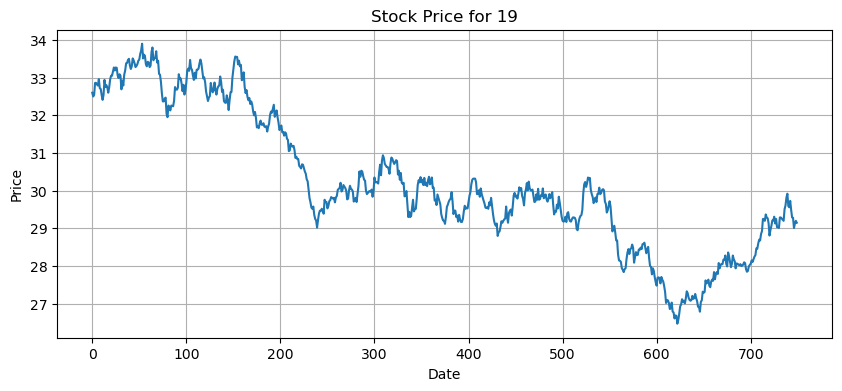

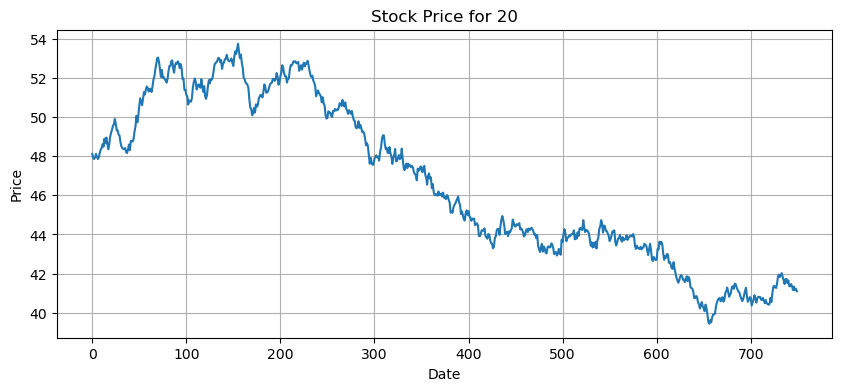

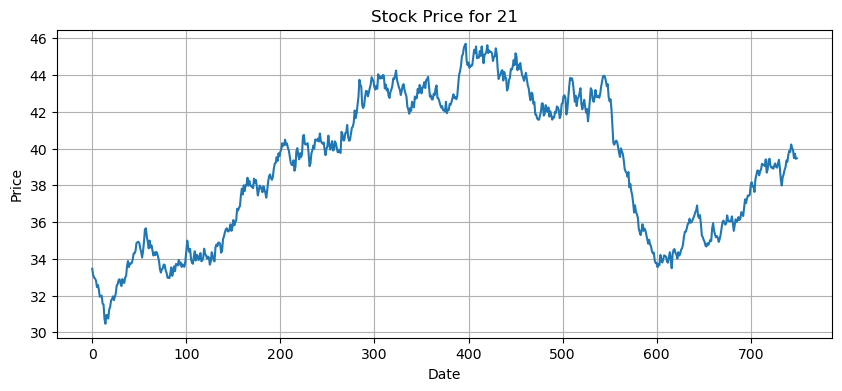

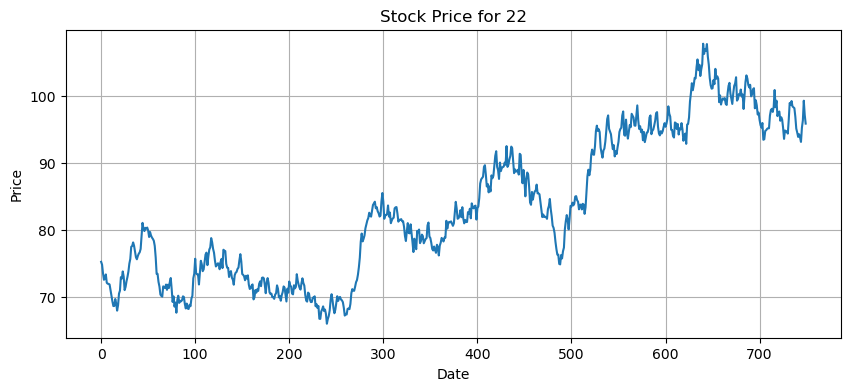

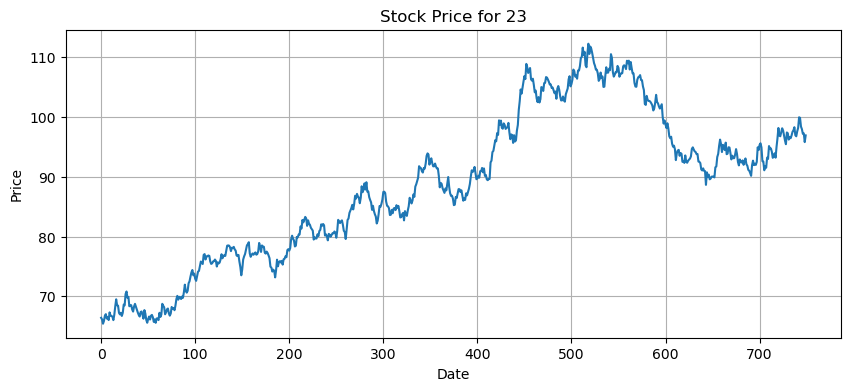

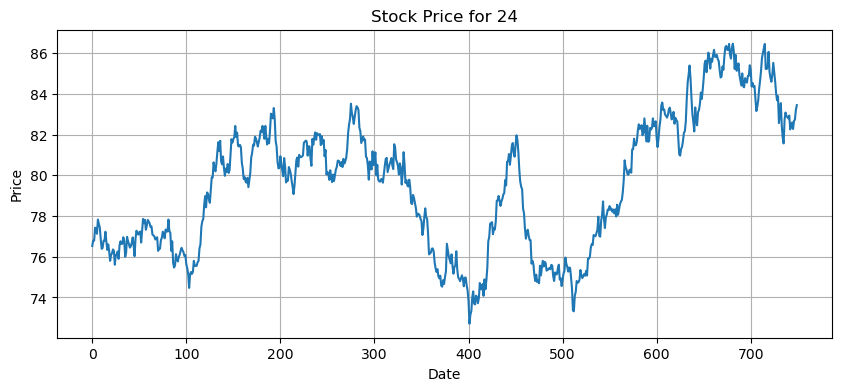

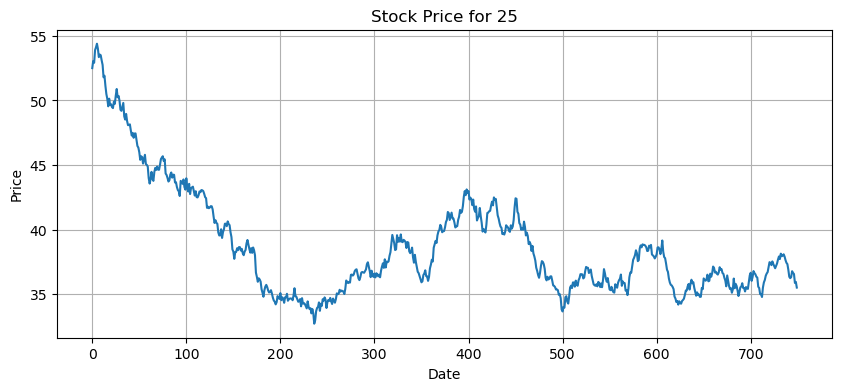

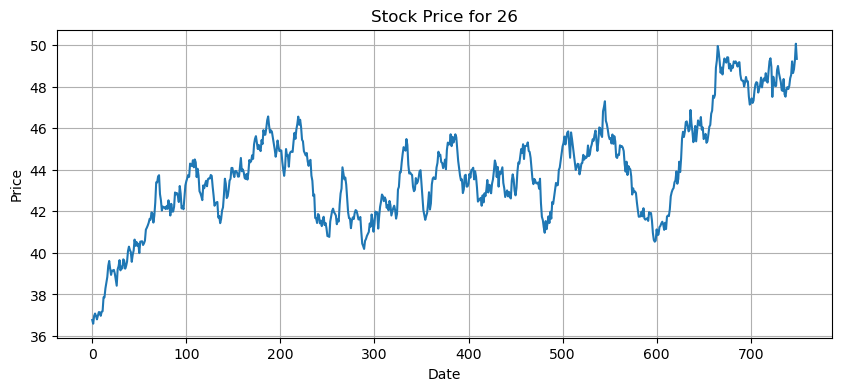

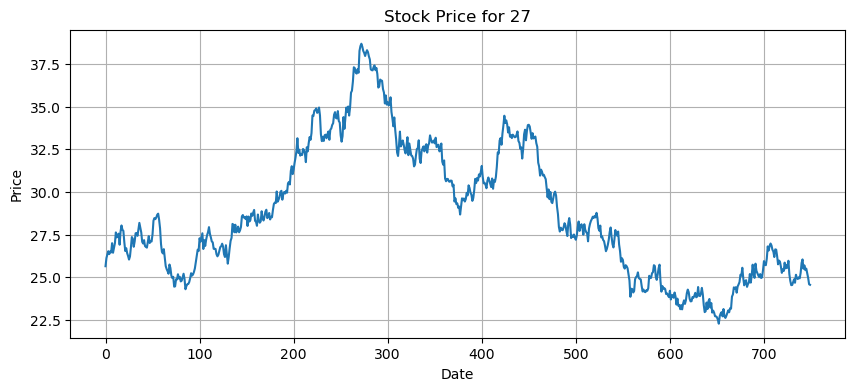

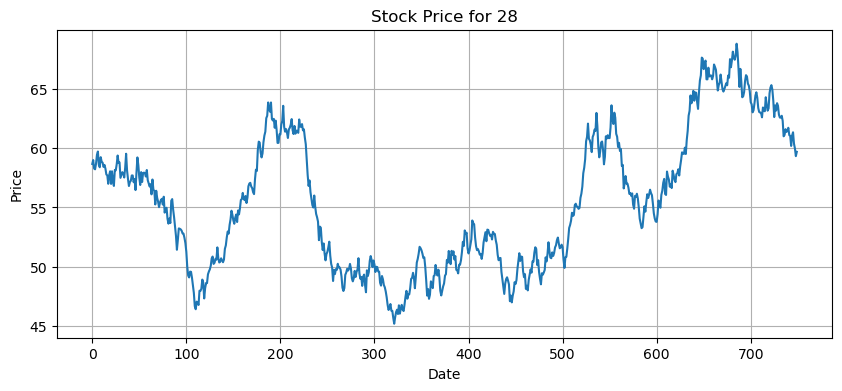

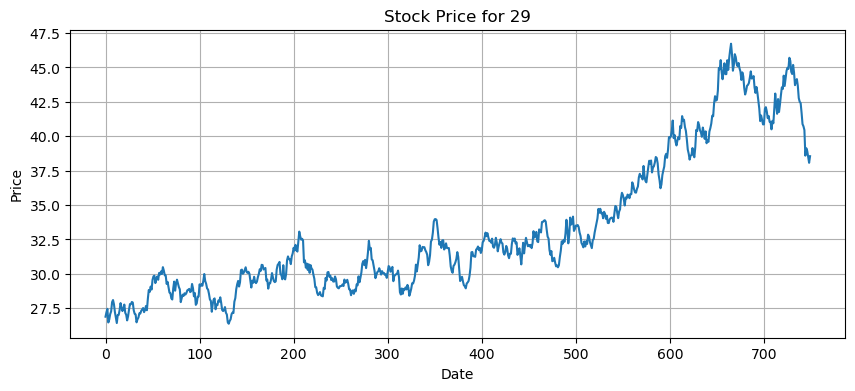

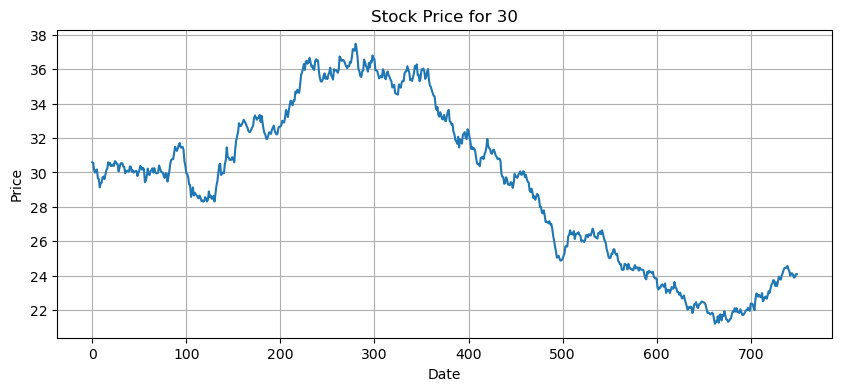

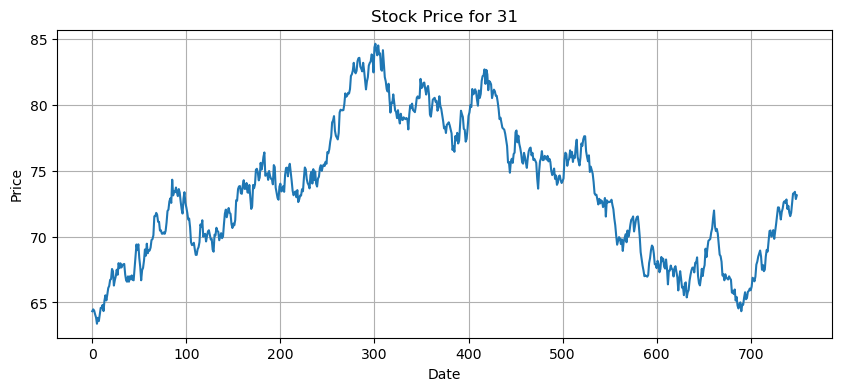

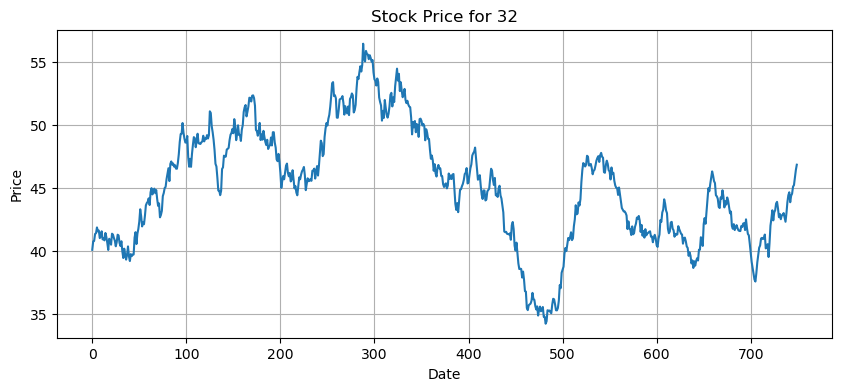

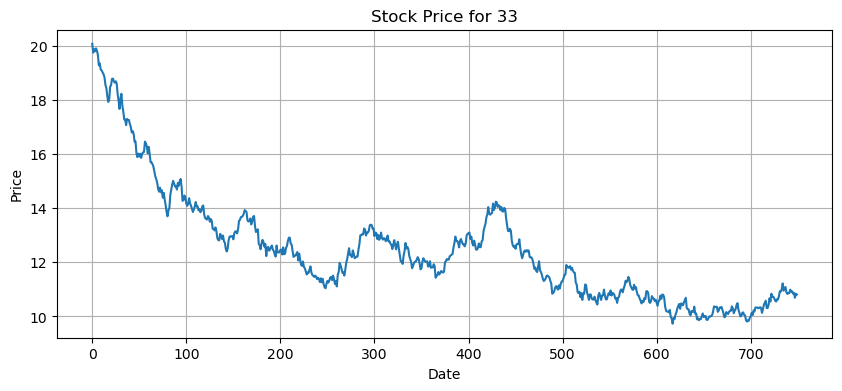

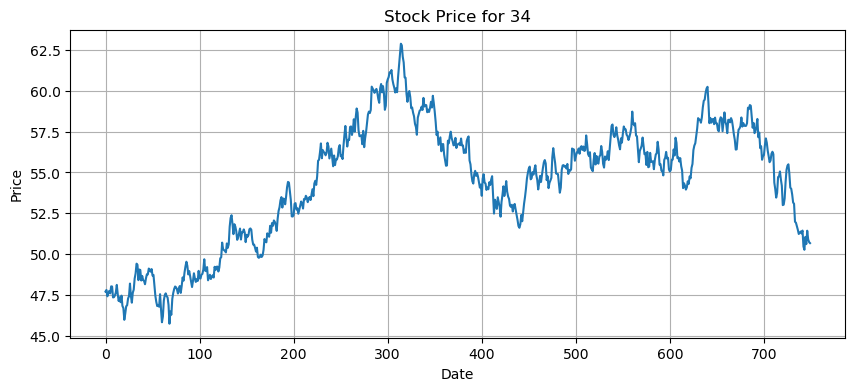

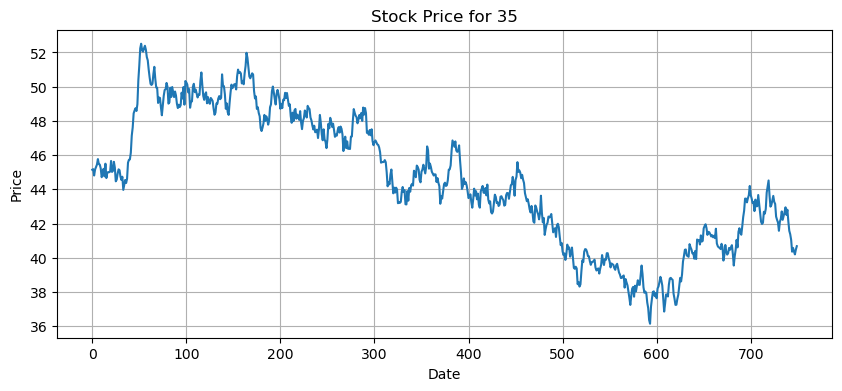

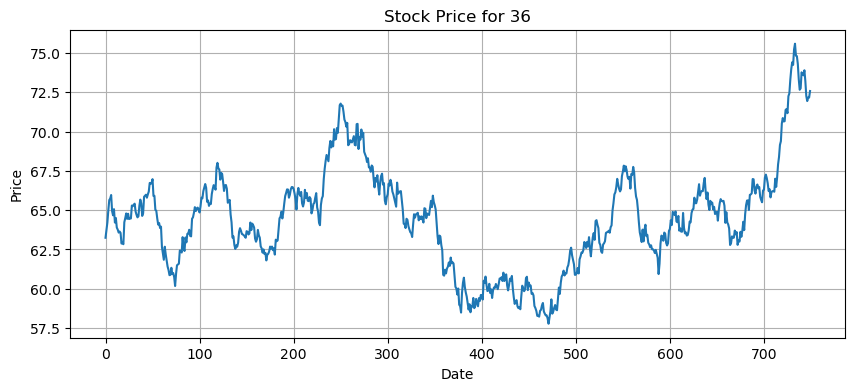

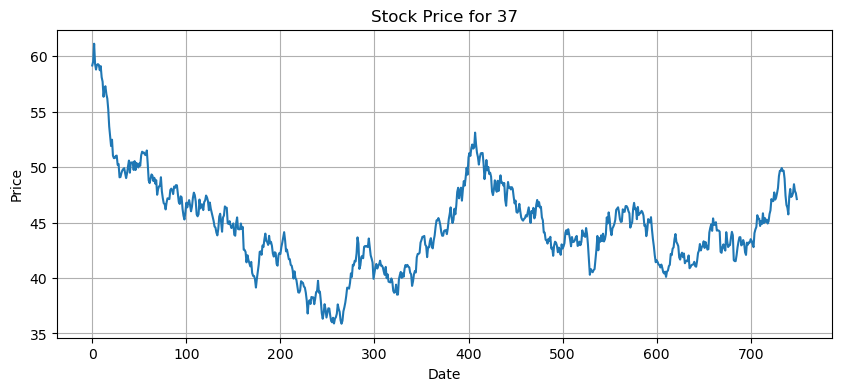

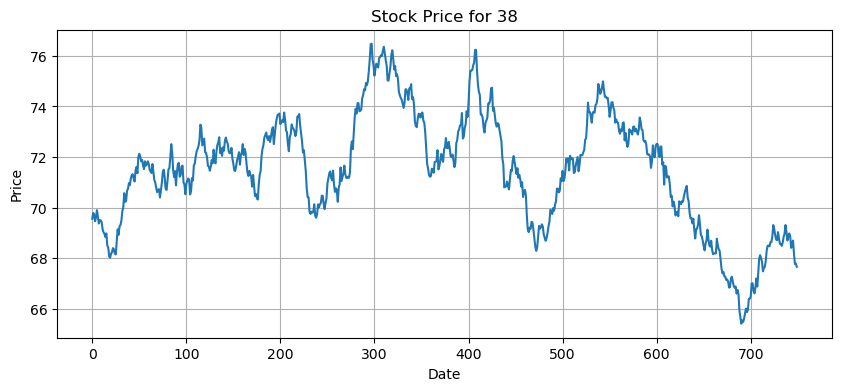

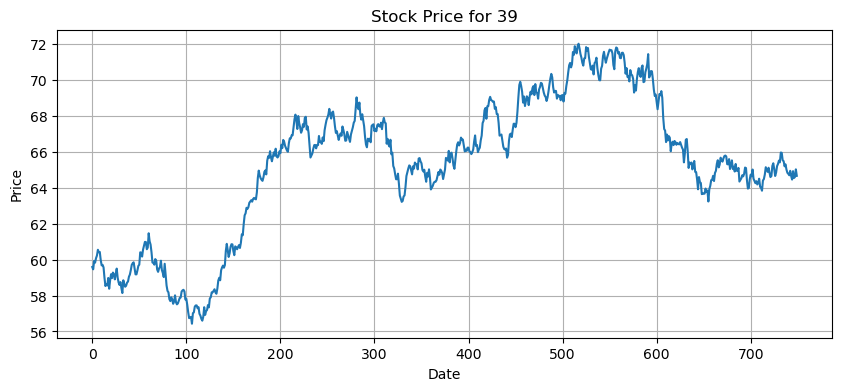

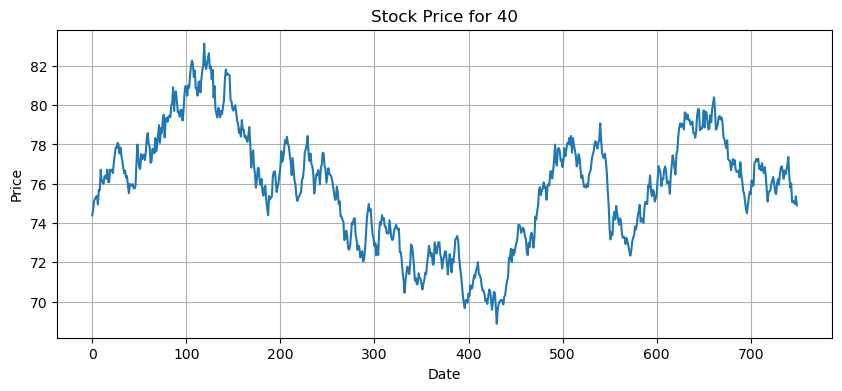

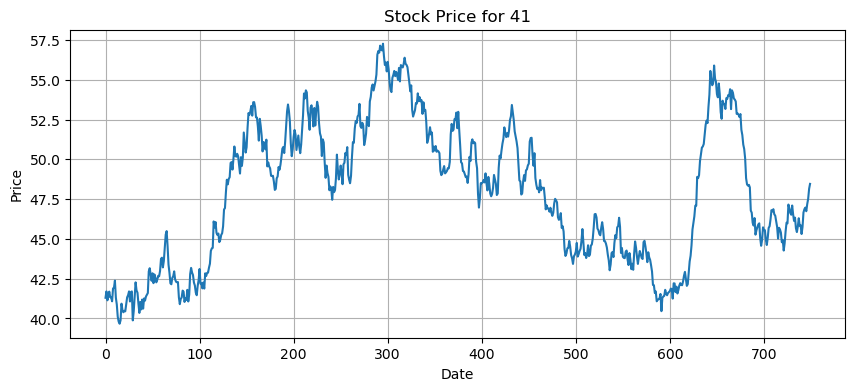

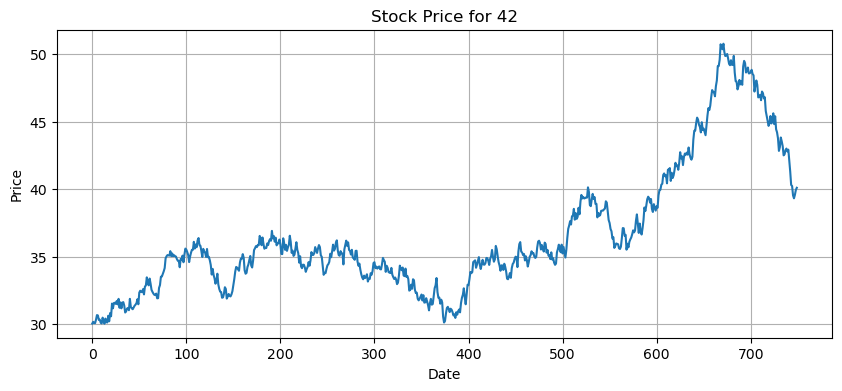

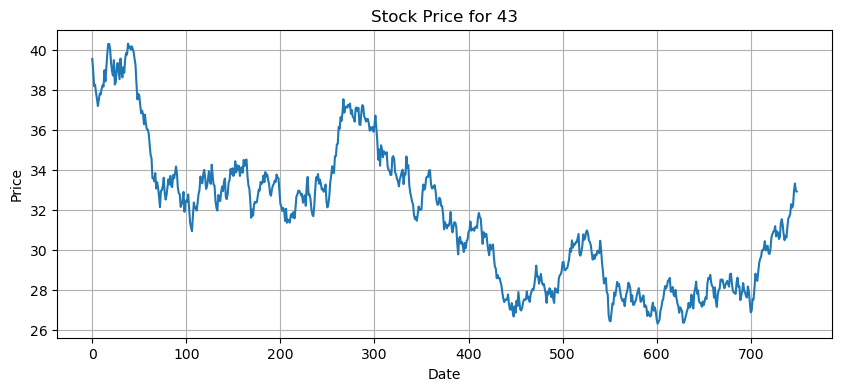

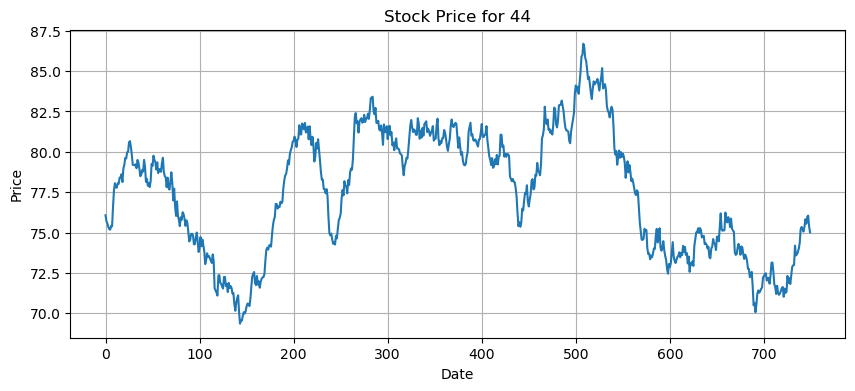

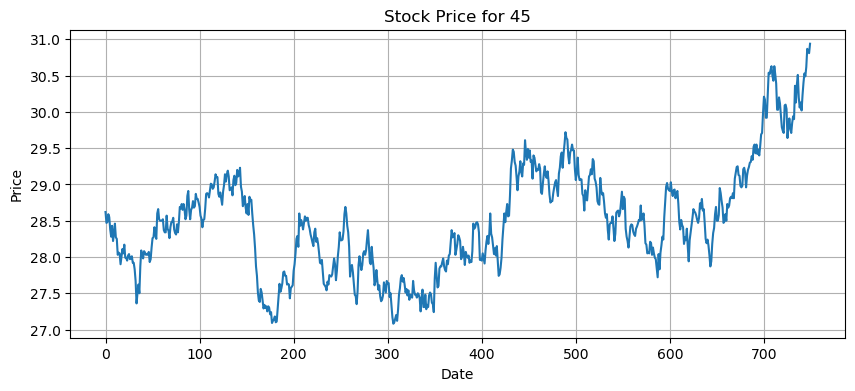

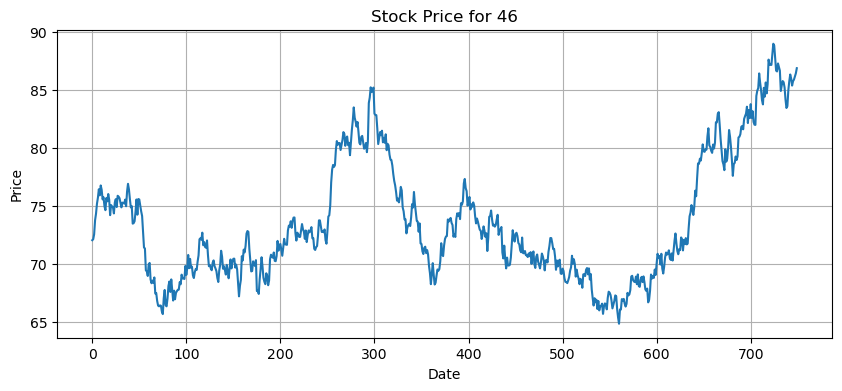

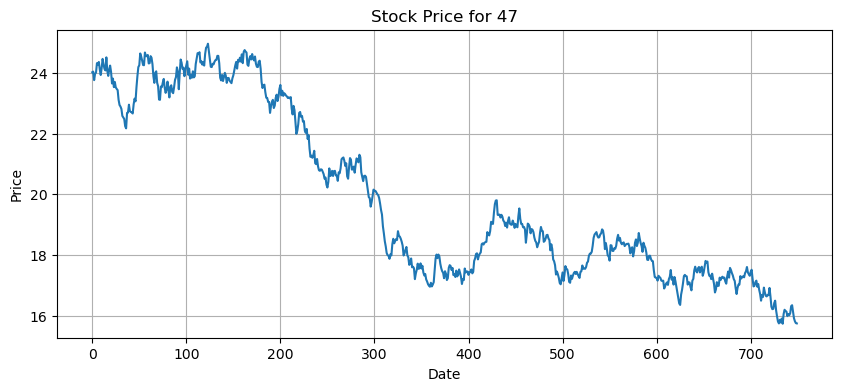

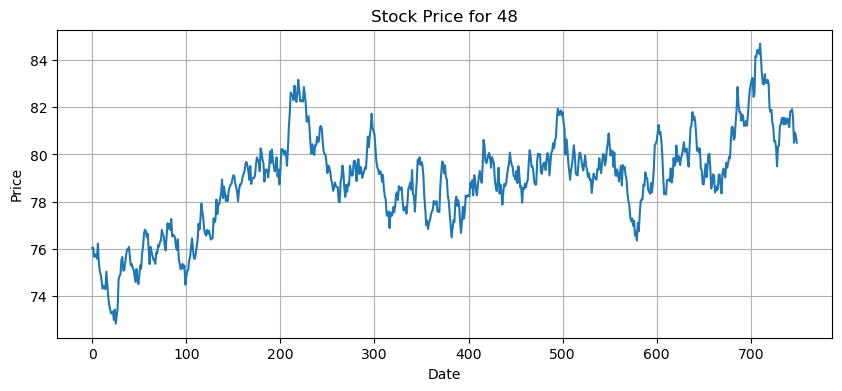

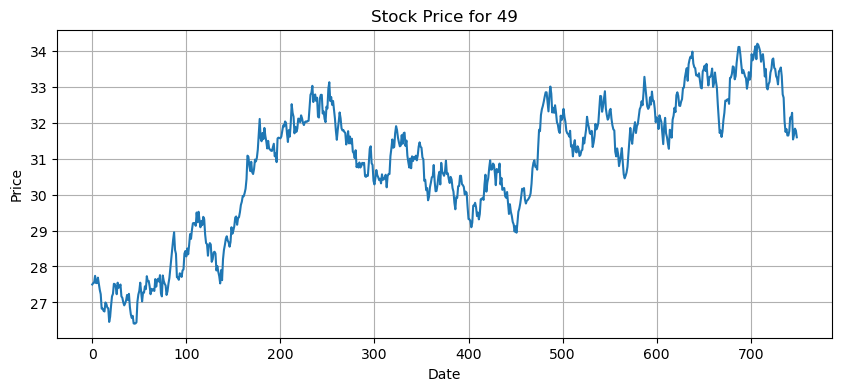

In [ ]:
# Assuming your DataFrame is named df
for col in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col])
    plt.title(f"Stock Price for {col}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

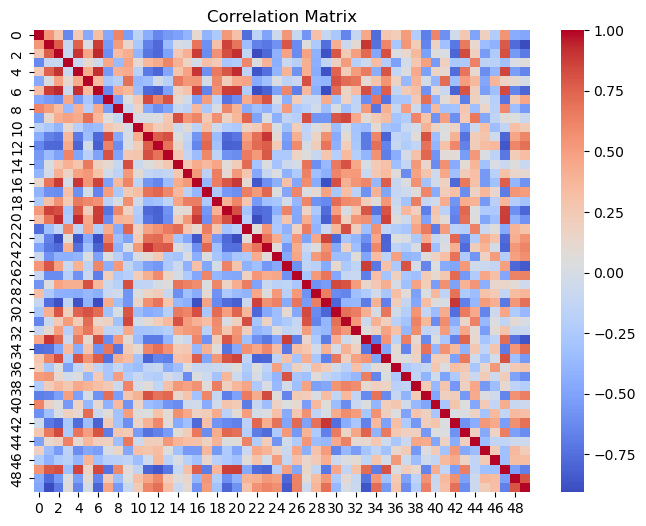

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
tester.data.shape

(50, 750)

In [7]:
def get_correlation_islands(data, corr_matrix, threshold):
    (n, _) = data.shape
    visited = [False for _ in range(n)]
    islands = []

    def dfs(u, cur_l):
        if visited[u]:
            return
        visited[u] = True
        cur_l.append(u)

        for v in range(n):
            if u == v or visited[v] or abs(corr_matrix[u][v]) < threshold:
                continue
            dfs(v, cur_l)

    for u in range(n):
        if visited[u]:
            continue
        cur_l = []
        dfs(u, cur_l)
        islands.append(cur_l)

    return [x for x in islands if len(x) > 1]

In [8]:
corr_islands = get_correlation_islands(tester.data, corr_matrix, 0.9)
print(len(corr_islands), [len(x) for x in corr_islands])

3 [2, 5, 2]


In [9]:
import plotly.graph_objs as go


def plot_selected_stocks_by_index(df, col_indices, isNormalised=True):
    """
    Plots selected columns by index from a pandas DataFrame using Plotly for interactivity.

    Parameters:
        df (pd.DataFrame): Your stock data.
        col_indices (list): List of integer column indices to plot.
        x (str or None): Column name to use for x-axis (e.g., 'Date'), or None to use index.
        title (str): Plot title.
    """
    fig = go.Figure()
    for idx in col_indices:
        col_name = df.columns[idx]
        x_data = df.index
        y_data = df.iloc[:, idx]
        if isNormalised:
            y_data = y_data / y_data.iloc[0]
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode="lines", name=str(col_name)))
    fig.update_layout(
        xaxis_title="Index",
        yaxis_title="Value",
        legend_title="Instrument",
        hovermode="x unified",
    )
    fig.show()

In [11]:
plot_selected_stocks_by_index(df, corr_islands[0])

In [18]:
plot_selected_stocks_by_index(df, [i for i in range(10)], False)